In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sci
import doppler
%matplotlib inline

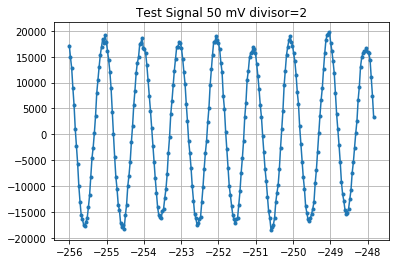

In [2]:
divisor = 2
vsamp = 62.5/divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

#Test signals at 1421MHz
#Horn is at 1420MHz

test50mv = np.loadtxt('arr50mv.txt')[0:N]
test50mvdv1 = np.loadtxt('arr50mvdv1.txt')[0:N]
test100mv = np.loadtxt('arr100mv.txt')[0:N]
test100mvdv1 = np.loadtxt('arr100mvdv1.txt')[0:N]
test200mv = np.loadtxt('arr200mv.txt')[0:N]
test200mvdv1 = np.loadtxt('arr200mvdv1.txt')[0:N]

plt.plot(t[0:2**8], test50mv[0:2**8], '.-')
plt.title('Test Signal 50 mV divisor=2')
plt.grid(True)
plt.show()


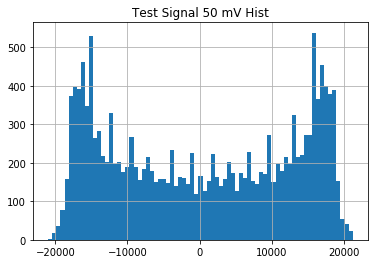

In [3]:
#Bimodal distribution??
plt.hist(test50mv, bins=75)
plt.title('Test Signal 50 mV Hist')
plt.grid(True)
plt.show()

C:\Users\Eden\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


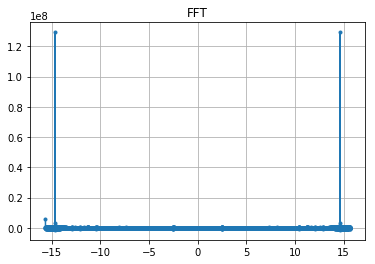

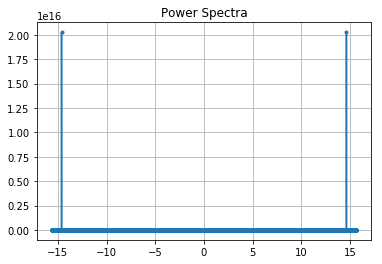

In [4]:
#Power Spectra/FFT
fft = sci.fft(test50mv)
power = np.abs(fft)**2

plt.plot(f,fft, '.-')
plt.title('FFT')
plt.grid(True)
plt.show()

plt.plot(f,power,'.-')
plt.title('Power Spectra')
plt.grid(True)
plt.show()

In [5]:
block1421_1a = np.genfromtxt("1421_5blocks.txt")[0:N]
block1421_1b = np.genfromtxt("1421_5blocks.txt")[N:N*2]
block1421_2a = np.genfromtxt("1421_5blocks.txt")[N*2:N*3]
block1421_2b = np.genfromtxt("1421_5blocks.txt")[N*3:N*4]
block1421_3a = np.genfromtxt("1421_5blocks.txt")[N*4:N*5]
block1421_3b = np.genfromtxt("1421_5blocks.txt")[N*5:N*6]
block1421_4a = np.genfromtxt("1421_5blocks.txt")[N*6:N*7]
block1421_4b = np.genfromtxt("1421_5blocks.txt")[N*7:N*8]
block1421_5a = np.genfromtxt("1421_5blocks.txt")[N*8:N*9]
block1421_5b = np.genfromtxt("1421_5blocks.txt")[N*9:N*10]


[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


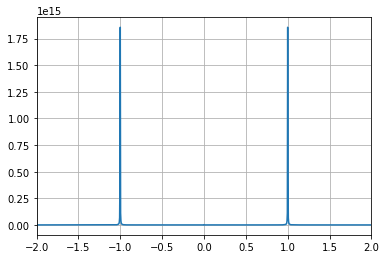

(2, 16000)


In [6]:
divisor = 1
N = 16000
vsamp = 62.5/divisor
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)


c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()
print(c.shape)

[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


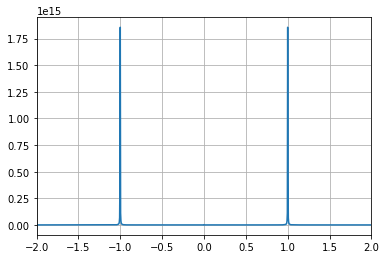

In [7]:
c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()

In [8]:
arr1419A = np.genfromtxt("1419_test_0.txt")[0:1584000]
arr1419B = np.genfromtxt("1419_test_0.txt")[1584000:3168000]
arr1419 = np.genfromtxt("1419_test_0.txt")
arr1421 = np.genfromtxt("1421_test_0.txt")
arr1420A = 0.1*np.genfromtxt("1420_notest_0.txt")[0:1584000]/(2.**15)
arr1420B = 0.1*np.genfromtxt("1420_notest_0.txt")[1584000:3168000]/(2.**15)
arr1420 = 0.1*np.genfromtxt("1420_notest_0.txt")/2**15

In [9]:
divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

powerlists = np.empty((2,16000))


for i in range(10):
    arr1420Aa = arr1420A[N*i:N*(i+1)]
    arr1420Bb = arr1420B[N*i:N*(i+1)]
    c = np.array([arr1420Bb] + [1j*arr1420Aa])
    power = np.abs(sci.fft(c))**2
    powerlists = np.append(powerlists, power, axis=0)


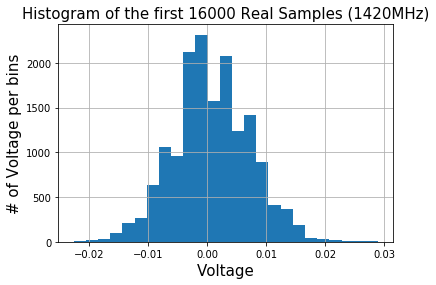

In [10]:
plt.hist(arr1420B[0:16000], bins=25)
plt.grid(True)
plt.xlabel('Voltage', fontsize=15)
plt.ylabel('# of Voltage per bins', fontsize=15)
plt.title('Histogram of the first 16000 Real Samples (1420MHz)', fontsize=15)
plt.show()

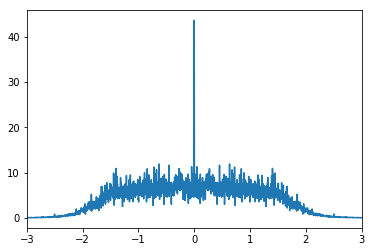

In [11]:
meanpower = np.mean(powerlists, axis=0)
plt.xlim(-3,3)
plt.plot(f, np.fft.fftshift(meanpower))
plt.show()

In [12]:
def make_complex(data, nblocs):
    split = np.array(np.split(data, 2*nblocs))
    real =  np.array(np.arange(0, 2*nblocs) >= nblocs, dtype = bool)
    imag = np.invert(real)
    return split[real] + 1j*split[imag]

In [13]:
c1 = make_complex(arr1419, 99)
c2 = make_complex(arr1421, 99)

In [14]:
def find_avg_power(c, n):
    power = np.abs(sci.fft(c))**2
    meanpower = np.mean(power, axis=0)
    print(meanpower.shape)

    plt.plot(f, np.fft.fftshift(meanpower))
    plt.xlabel('Frequency [MHz]',fontsize=16)
    plt.ylabel('Voltage Time',fontsize=16)
    plt.title(str(n) + ' MHz Power Spectra', fontsize =16)
    plt.xlim(-1.5,1.5)
    plt.ylim(0,1e16)
    plt.grid(True)
    plt.show()

(16000,)


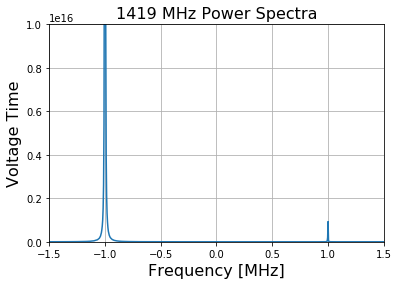

(16000,)


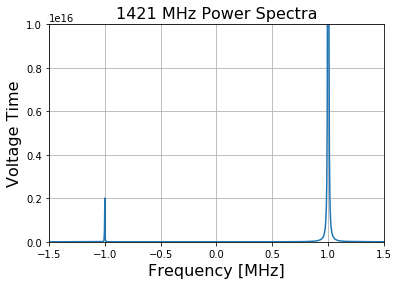

In [15]:
find_avg_power(c1, 1419)
find_avg_power(c2, 1421)

In [16]:
c3 = make_complex(arr1420, 99)

(99, 16000)


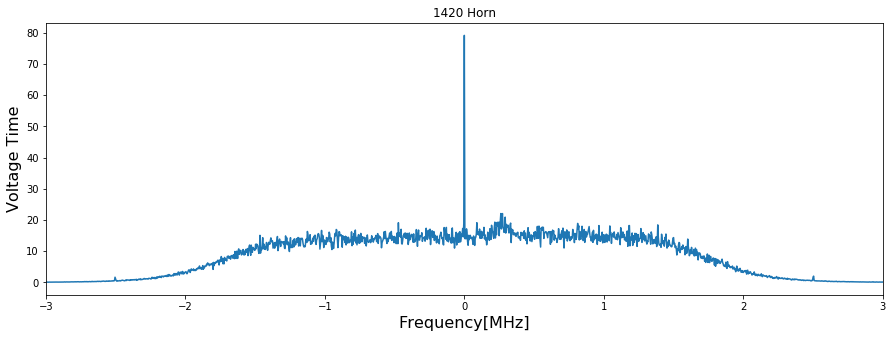

In [17]:
divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

print(c3.shape)
c3fft = sci.fft(c3)
c3power = np.abs(c3fft)**2
c3mean = np.mean(c3power,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f, np.fft.fftshift(c3mean))
plt.title('1420 Horn')
plt.xlabel('Frequency[MHz]',fontsize=16)
plt.ylabel('Voltage Time',fontsize=16)
plt.xlim(-3,3)
plt.show()

In [18]:
arr1231 = np.zeros((50,16000))
arr1229 = np.zeros((50,16000))

for i in range(20):
    loop1231 = .1*np.genfromtxt('1231USB/1231_USB_'+ str(i)+'.txt')/2**15
    loop1231 = np.asarray(loop1231)
    c1231 = make_complex(loop1231, 50)
    fft1231 = sci.fft(c1231)
    power1231 = np.abs(fft1231)**2
    arr1231 = arr1231 + power1231

for i in range(20):                
    loop1229 = .1*np.genfromtxt('1229LSB/1229_LSB_'+str(i)+'.txt')/2**15
    loop1229 = np.asarray(loop1229)
    c1229 = make_complex(loop1229, 50)
    fft1229 = sci.fft(c1229)
    power1229 = np.abs(fft1229)**2
    arr1229 = arr1229 + power1229

In [19]:
test1 = .1*np.genfromtxt('1229LSB/1229_LSB_1.txt')/2**15

In [20]:
bbc = np.zeros((50,16000))
for i in range(4):
    bb = .1*np.genfromtxt('BlackBody1230\BlackBody_'+str(i)+'.txt')/2**15
    bb = np.asarray(bb)
    cbb = make_complex(bb, 50)
    fftbb =  sci.fft(cbb)
    powerbb = np.abs(fftbb)**2
    meanbb = np.mean(powerbb, axis=0)
    bbc = bbc + meanbb


skyc = np.zeros((50,16000))
for i in range(4):
    sky = .1*np.genfromtxt('ColdSky1230\ColdSky_'+str(i)+'.txt')/2**15
    sky = np.asarray(sky)
    csky = make_complex(sky,50)
    fftsky = sci.fft(csky)
    powersky = np.abs(fftsky)**2
    meansky = np.mean(powersky, axis=0)
    skyc = skyc + meansky

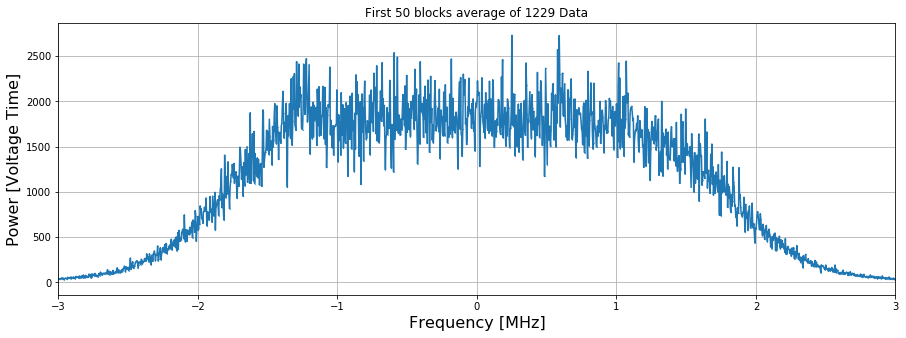

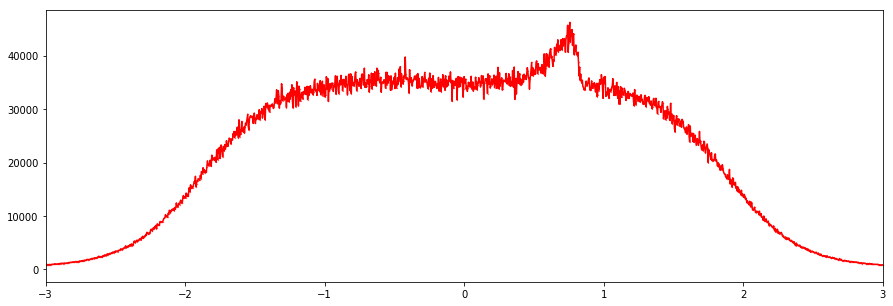

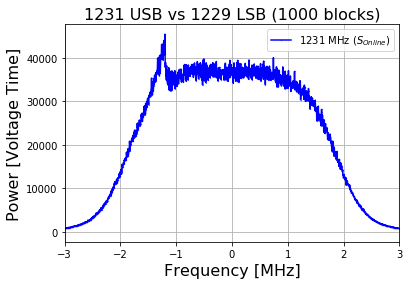

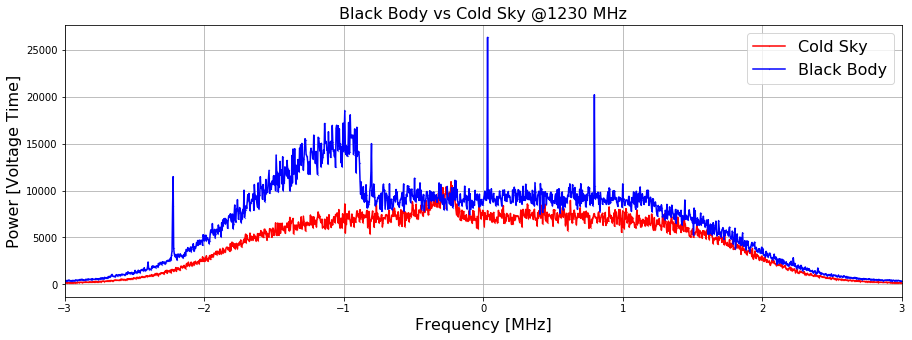

In [74]:
######################################   7.1 - LSB/USB ###############################################

vsamp = 62.5
N = 16000
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

c1 = make_complex(test1, 50)
cfft = sci.fft(c1)
powerc = np.abs(cfft)**2
meanc = np.mean(np.fft.fftshift(powerc),axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,meanc, '.-', markersize=0.5)
plt.xlim(-3,3)
plt.title('First 50 blocks average of 1229 Data')
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.show()

mean1231 = np.mean(arr1231,axis=0)
mean1229 = np.mean(arr1229,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,np.fft.fftshift(mean1231), 'r.-', markersize=0.5)
plt.xlim(-3,3)
plt.show()

plt.xlim(-3,3)
plt.plot(f,np.fft.fftshift(mean1229), 'b.-',markersize=0.5)
plt.title('1231 USB vs 1229 LSB (1000 blocks)', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.xlim(-3,3)
plt.legend(('1231 MHz ($S_{Online}$)', '1229 MHz ($S_{Offline}$)'))
plt.show()

################################### 7.1 - BlackBody/ColdSky ############################################

divisor = 1
vsamp = 62.5 #divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

skymean2 = np.average(skyc,axis=0)
bbmean2 = np.average(bbc,axis=0)

plt.figure(figsize=(15,5))
plt.plot(f,np.fft.fftshift(skymean2), 'r.-',markersize=0.5)
plt.plot(f,np.fft.fftshift(bbmean2), 'b.-',markersize=0.5)
plt.title('Black Body vs Cold Sky @1230 MHz', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.xlim(-3,3)
plt.legend(['Cold Sky', 'Black Body'], fontsize=16)
plt.show()

(16000,)


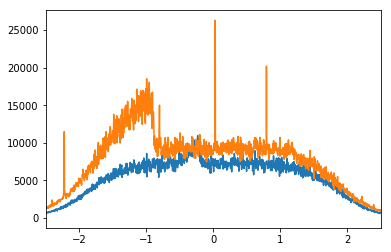

(50, 16000)


In [22]:
avgsky = np.average(skyc, axis=0)
avgbb = np.average(bbc, axis=0)
print(avgsky.shape)
plt.plot(f, np.fft.fftshift(avgsky))
plt.plot(f, np.fft.fftshift(avgbb))
plt.xlim(-2.5,2.5)
plt.show()
print(skyc.shape)

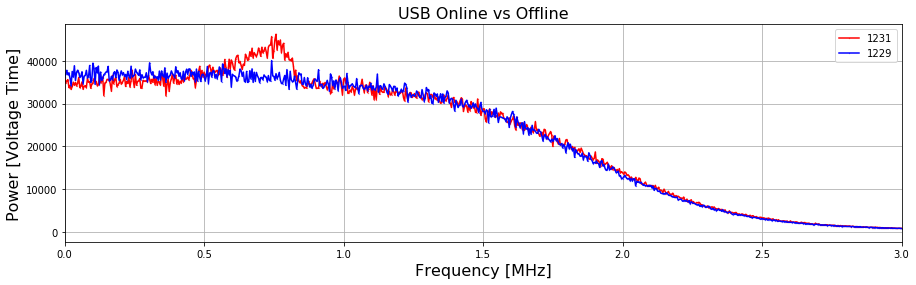

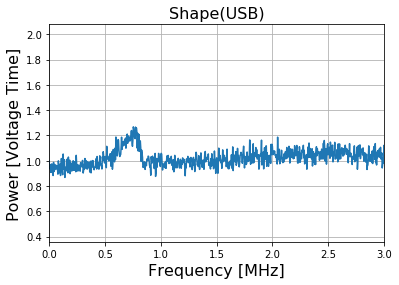

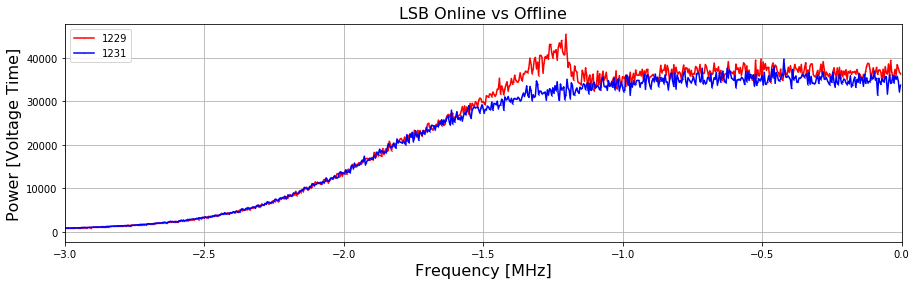

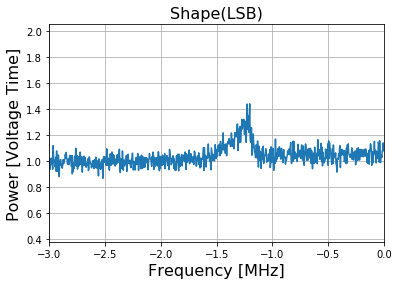

[ 299792.          299791.1753081   299790.3506162  ...,  293196.93886444
  293196.11417254  293195.28948063]


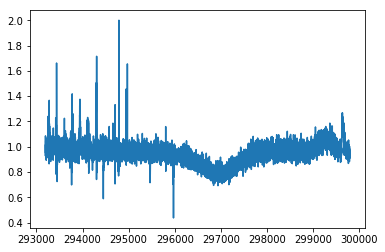

In [23]:
############################################### 7.2 Line Shape #####################################################

vsamp=62.5
N = 16000
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

USB_online = np.fft.fftshift(mean1231)[8000:16000]
USB_offline = np.fft.fftshift(mean1229)[8000:16000]

plt.figure(figsize=(15,4))
plt.plot(f[8000:], USB_online, 'r.-', markersize=0.5)
plt.plot(f[8000:],USB_offline, 'b.-',markersize=0.5)
plt.grid(True)
plt.xlim(0,3)
plt.legend(('1231', '1229'))
plt.title('USB Online vs Offline', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.show()

shape1 = USB_online/USB_offline
plt.title('Shape(USB)', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.plot(f[8000:], shape1)
plt.xlim(0,3)
plt.show()

LSB_online = np.fft.fftshift(mean1229)[0:8000]
LSB_offline = np.fft.fftshift(mean1231)[0:8000]

plt.figure(figsize=(15,4))
plt.plot(f[0:8000], LSB_online, 'r.-', markersize=0.5)
plt.plot(f[0:8000], LSB_offline, 'b.-',markersize=0.5)
plt.xlim(-3,0)
plt.grid(True)
plt.title('LSB Online vs Offline', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.legend(('1229', '1231'))
plt.show()

shape2 = LSB_online/LSB_offline
plt.plot(f[0:8000], shape2)
plt.xlim(-3,0)
plt.title('Shape(LSB)', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.show()

df = f[8000:] - 1420
f0 = 1420
c =  299792 #km/s
v = -(df/f0)* c
print(v)

plt.plot(v,shape1)
plt.xlim()
plt.show()

In [24]:

def peak_finder(signal_array):
    threshold = 1.35
    peaks = []                                                    
    for i in range(2,len(signal_array)-2): 
        if signal_array[i] > signal_array[i+1] and signal_array[i] > signal_array[i-1] and signal_array[i] > signal_array[i-2] and signal_array[i] > signal_array[i+2]:  
            if signal_array[i] > threshold:                     
                peaks.append(i)
    return peaks
#print('peaks = ',peak_finder(FlorIntents))

def centroid(x_range,y_range):
    '''A function to return the centroid given equally sized x and y ranges over which to perform the calculation'''
    x_range = np.array(x_range)
    y_range = np.array(y_range) 
    x = np.sum(x_range*y_range) 
    y = np.sum(y_range)
    x_centroid = x/y
    return x_centroid


def find_all_centroids(x_range,y_range):
	peaks = peak_finder(y_range) #define the peak positions in x indicies
	#print(peaks)
	multicen = [] #empty array to append
	for i in peaks: #for loops for indicies in peaks
	   y = y_range[i] #define the y which uses the y-axis indicies
	   halfmax = y/2 #half of each peaks
	   #print(halfmax)
	   #multicen.append(centroid(x_range[i-4:i+4],y_range[i-4:i+4]))
	   #The following codes are for more general way:
	   dr = np.where(y_range[i:] < halfmax)[0][0] # everything to the right after half of each peaks
	   dl = np.where(y_range[:i] < halfmax)[0][-1] # everything to the left
	   multicen.append(centroid(x_range[dl:i+dr], y_range[dl:i+dr])) #append centroid back
	return multicen #returns multicen = [] with each newl updated centroid





[  -299792.           -298238.66069771   -296685.32139541 ...,
  12122262.40045099  12123815.73975328  12125369.07905558]


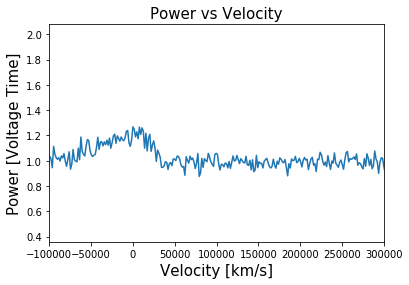

In [25]:
df = f[8000:] - 0.7539
f0 = 0.7539
c =  299792 #km/s
v = (df/f0)* c
print(v)
plt.plot(v, shape1)
plt.xlim(-100000,300000)
plt.title('Power vs Velocity',fontsize=15)
plt.xlabel('Velocity [km/s]',fontsize=15)
plt.ylabel('Power [Voltage Time]',fontsize=15)
plt.show()

(16000,)
(50, 16000)


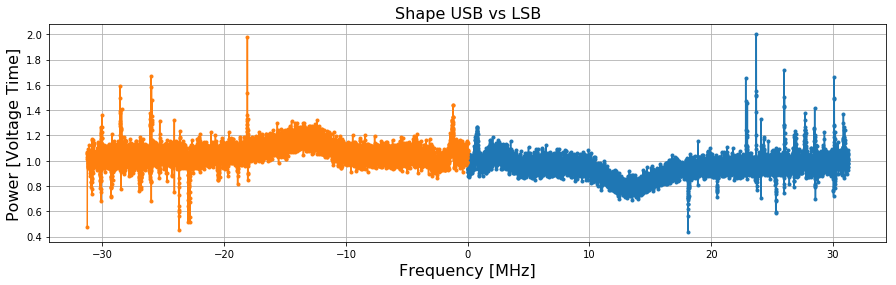

T_sys,coldsky =  205.30881105 K


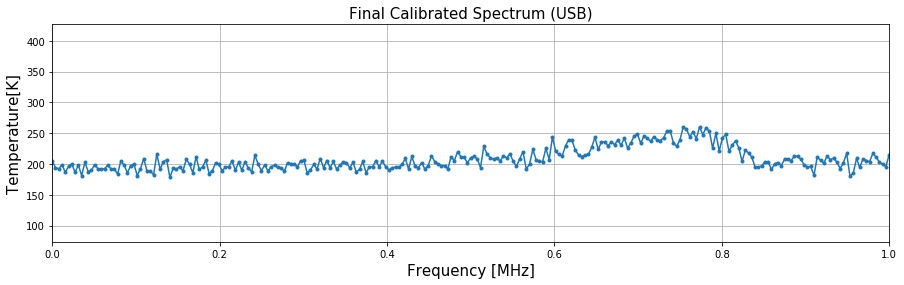

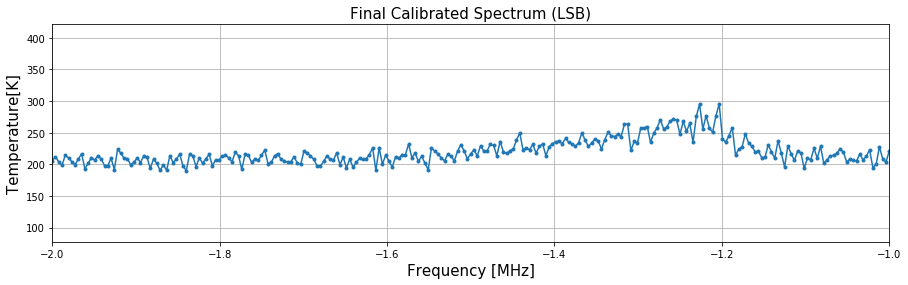

In [26]:

print(skymean2.shape)
print(skyc.shape)
plt.figure(figsize = (15,4))
plt.plot(f[8000:], shape1, '.-')
plt.plot(f[0:8000], shape2, '.-')
plt.title('Shape USB vs LSB', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.grid(True)
plt.show()

############################   7.3   ###################################
sumsky = np.sum(skymean2)
sumdiff = np.sum(bbmean2 - skymean2)
x = (sumsky/sumdiff)#in kevlin
t_cal = 300
t_sc = (x*t_cal)/(1 + x)
print('T_sys,coldsky = ', t_sc, 'K')

final1 = shape1*t_sc
final2 = shape2*t_sc
plt.figure(figsize = (15,4))
plt.grid(True)
plt.plot(f[8000:], final1, '.-')
plt.title('Final Calibrated Spectrum (USB)',fontsize=15)
plt.ylabel('Temperature[K]',fontsize=15)
plt.xlabel('Frequency [MHz]',fontsize=15)
plt.xlim(0,1)
plt.show()

plt.figure(figsize = (15,4))
plt.plot(f[0:8000], final2, '.-')
plt.title('Final Calibrated Spectrum (LSB)',fontsize=15)
plt.grid(True)
plt.ylabel('Temperature[K]',fontsize=15)
plt.xlabel('Frequency [MHz]',fontsize=15)
plt.xlim(-2,-1)
plt.show()

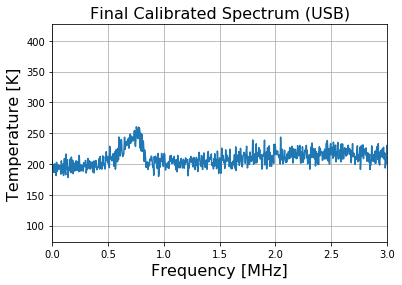

[-24.42021337]


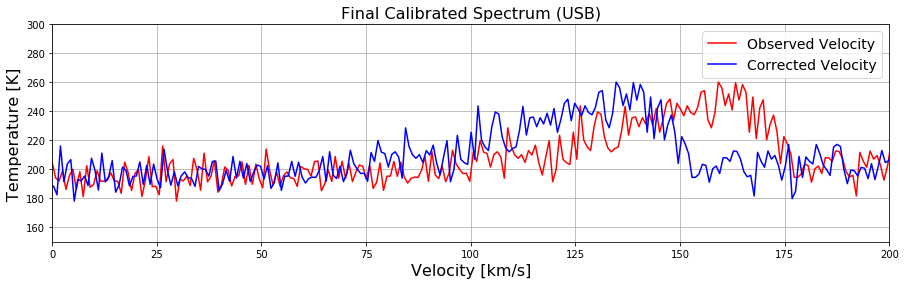

In [101]:
################################## 7.4 ###################################

fo = 1420
c =  299792 #km/s
fv = -(fo - (f + 1420))/fo*c

plt.plot(f[8000:], final1)
plt.xlim(0, 3)
plt.grid(True)
plt.title('Final Calibrated Spectrum (USB)', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.ylabel('Temperature [K]', fontsize=16)
plt.show()

corrected_v1 = doppler.get_projected_velocity(20.4, 37.873199, 2458168.60493,
                                              obs_lat=37.873199,
                                              obs_lon=-122.257063,
                                              obs_alt=120.0,
                                              epoch=2451545.0)
print(corrected_v1/1000)
fvv = fv + corrected_v1/1000

plt.figure(figsize = (15,4))
plt.plot(fv[8000:], final1, 'r-')
plt.plot(fvv[8000:], final1, 'b-')
plt.xlim(0,200)
plt.ylim(150,300)
plt.grid(True)
plt.title('Final Calibrated Spectrum (USB)', fontsize=16)
plt.xlabel('Velocity [km/s]', fontsize=16)
plt.ylabel('Temperature [K]', fontsize=16)
plt.legend(['Observed Velocity','Corrected Velocity'], fontsize=14)
plt.show()

7.4 - Plotting Intensity vs Frequency and Velocity

(21,)
(21,)


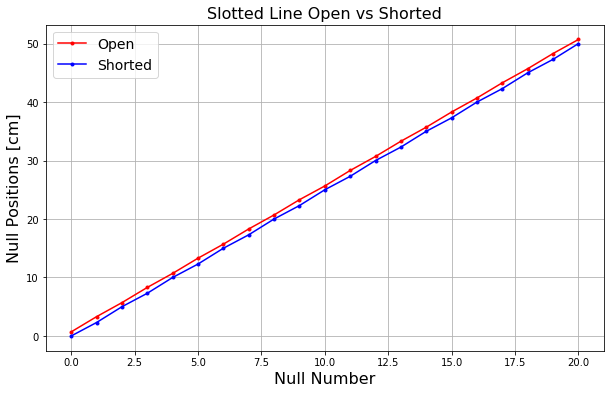

Velocity is =  150000000.0 m/s
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


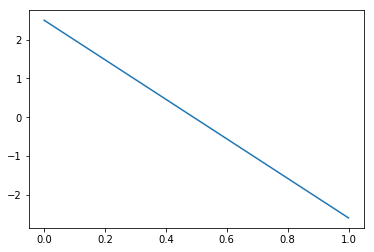

[ 2.5       -2.5952381]


In [162]:
coax_open = np.array([0.7, 3.3, 5.7, 8.3, 10.7, 13.3, 15.7, 18.3, 20.7, 23.3,
                      25.65, 28.3, 30.7,33.3, 35.7,38.3, 40.7, 43.3, 45.7, 48.3, 50.7])
coax_short = np.array([0, 2.3, 5, 7.3, 10, 12.3, 15, 17.3, 20, 22.3,
                        25, 27.3, 30, 32.3, 35, 37.3, 40, 42.3, 45, 47.3, 50])

print(coax_short.shape)
print(coax_open.shape)
plt.figure(figsize=(10,6))
plt.title('Slotted Line Open vs Shorted',fontsize=16)
plt.ylabel('Null Positions [cm]',fontsize=16)
plt.xlabel('Null Number',fontsize=16)
plt.grid(True)
plt.plot(coax_open, 'r.-')
plt.plot(coax_short, 'b.-')
plt.legend(['Open','Shorted'], fontsize=14)
plt.show()

freq = 3e9 #cycles per seconds (GHz)
wl = 5e-2 #meters
v = freq*wl
print('Velocity is = ', v, 'm/s')

x = np.arange(1,22)
print(x)
fit = np.polyfit(x, coax_short, 1)
plt.plot(fit)
plt.show()
print(fit)

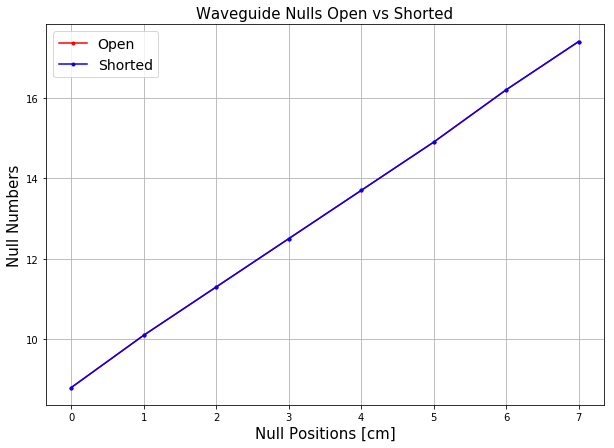

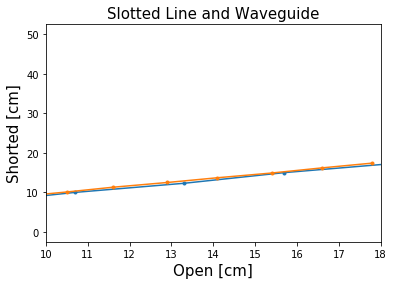

0.03333333333333333
0.11020408163265309
216000000.0
0.72


In [172]:
waveguide_open = np.array([9.2, 10.5, 11.6, 12.9, 14.1, 15.4, 16.6, 17.8])
waveguide_short = np.array([8.8, 10.1, 11.3, 12.5, 13.7, 14.9, 16.2, 17.4])

plt.figure(figsize=(10,7))
plt.plot(waveguide_short, 'r.-')
plt.plot(waveguide_short, 'b.-')
plt.title('Waveguide Nulls Open vs Shorted',fontsize=15)
plt.xlabel('Null Positions [cm]',fontsize=15)
plt.ylabel('Null Numbers',fontsize=15)
plt.legend(['Open', 'Shorted'], fontsize = 14)
plt.grid(True)
plt.show()
           
plt.plot(coax_open, coax_short, '.-')
plt.plot(waveguide_open, waveguide_short, '.-')
plt.title('Slotted Line and Waveguide',fontsize=15)
plt.xlabel('Open [cm]',fontsize=15)
plt.ylabel('Shorted [cm]',fontsize=15)
plt.xlim(10,18)
plt.show()

c = 3e8 #m/s
lamfs = c/9e9 
print(lamfs)
lamg = 0.024 #meter
a = (lamfs)/(2*((1-(lamfs/lamg))**2))
print(a)
vp = lamg* 9e9
print(vp)
print(vp/c)

In [29]:
galactic = np.zeros((50,16000))

for i in range(20):
    gal = .1*np.genfromtxt('Galactic/Galactic_'+ str(i)+'.txt')/2**15
    gal = np.asarray(gal)
    cgal = make_complex(gal, 50)
    fftgal = sci.fft(cgal)
    powergal = np.abs(fftgal)**2
    galactic = galactic + powergal

In [30]:
galactic1229 = np.zeros((50,16000))
galactic1231 = np.zeros((50,16000))


for i in range(20):
    gal1229 = .1*np.genfromtxt('Galactic1229/Galactic1229_'+ str(i)+'.txt')/2**15
    gal1229 = np.asarray(gal1229)
    cgal1229 = make_complex(gal1229, 50)
    fftgal1229 = sci.fft(cgal1229)
    powergal1229 = np.abs(fftgal1229)**2
    galactic1229 = galactic1229 + powergal1229
    
for i in range(20):
    gal1231 = .1*np.genfromtxt('Galactic1231/Galactic1231_'+ str(i)+'.txt')/2**15
    gal1231 = np.asarray(gal1231)
    cgal1231 = make_complex(gal1231, 50)
    fftgal1231 = sci.fft(cgal1231)
    powergal1231 = np.abs(fftgal1231)**2
    galactic1231 = galactic1231 + powergal1231

In [31]:
powergal1229

array([[   57.16802368,   119.83944261,   907.37449226, ...,
          956.98156056,   412.35928592,   243.8829475 ],
       [ 1006.76546509,   176.24820987,   298.03662704, ...,
         1405.91871323,  1143.19867004,   132.61154391],
       [ 2233.97042786,   631.82812658,   802.93569588, ...,
          366.00856718,  2495.50653385,   286.69267846],
       ..., 
       [ 1171.61379028,  2901.97106256,   221.77324708, ...,
         1136.49449581,   542.88649815,  2024.08950572],
       [  201.46923828,  1823.60014948,  3269.93852335, ...,
         2036.84837207,   336.96527256,   372.52013384],
       [  277.99251038,   854.56346481,   120.12806433, ...,
         2809.15310858,   489.46011622,  3184.00350146]])

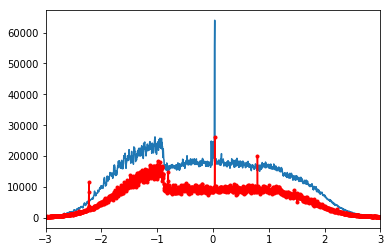

In [32]:
meangal = np.mean(galactic,axis=0)
plt.plot(f, np.fft.fftshift(meangal))
plt.plot(f, np.fft.fftshift(avgbb), 'r.-')
plt.xlim(-3,3)
plt.show()

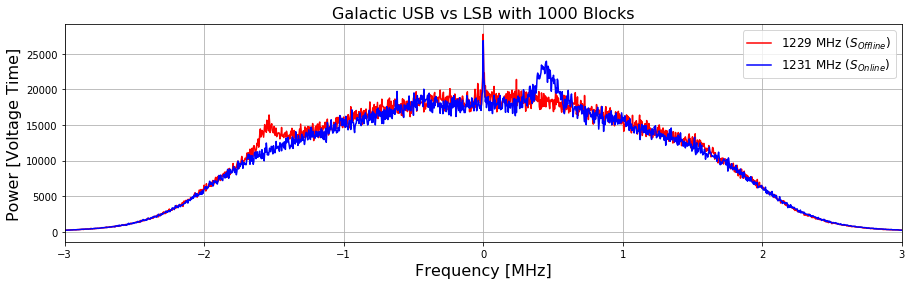

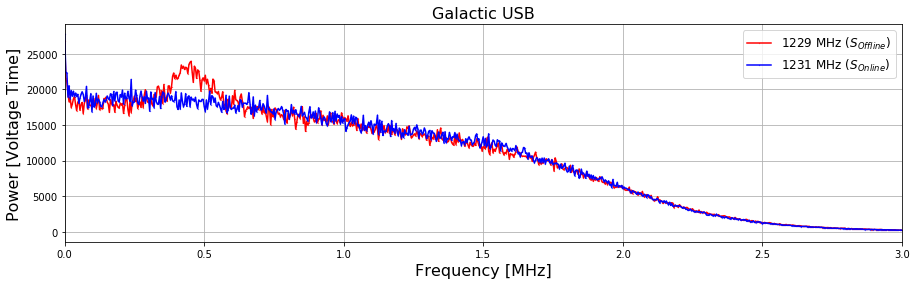

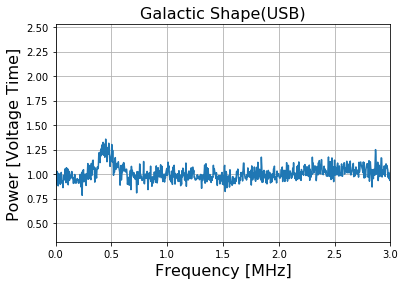

In [110]:
############################################GALACTIC 1229 vs 1231 ##################################################

meangal1229 = np.median(galactic1229, axis=0)
meangal1231 = np.median(galactic1231, axis=0)

plt.figure(figsize=(15,4))
plt.plot(f, np.fft.fftshift(meangal1229), 'r-')
plt.plot(f, np.fft.fftshift(meangal1231), 'b-')
plt.xlim(-3,3)
plt.title('Galactic USB vs LSB with 1000 Blocks', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.legend(['1229 MHz ($S_{Offline}$)','1231 MHz ($S_{Online}$)'], fontsize=12)
plt.grid(True)
plt.show()


USB_onlinegal = np.fft.fftshift(meangal1231)[8000:16000]
USB_offlinegal = np.fft.fftshift(meangal1229)[8000:16000]

plt.figure(figsize=(15,4))
plt.plot(f[8000:], USB_onlinegal, 'r.-', markersize=0.5)
plt.plot(f[8000:], USB_offlinegal, 'b.-',markersize=0.5)
plt.grid(True)
plt.xlim(0,3)
plt.title('Galactic USB', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.legend(['1229 MHz ($S_{Offline}$)','1231 MHz ($S_{Online}$)'], fontsize=12)
plt.grid(True)
plt.show()

shape1 = USB_onlinegal/USB_offlinegal
plt.title('Galactic Shape(USB)', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.ylabel('Power [Voltage Time]', fontsize=16)
plt.grid(True)
plt.plot(f[8000:], shape1)
plt.xlim(0,3)
plt.show()

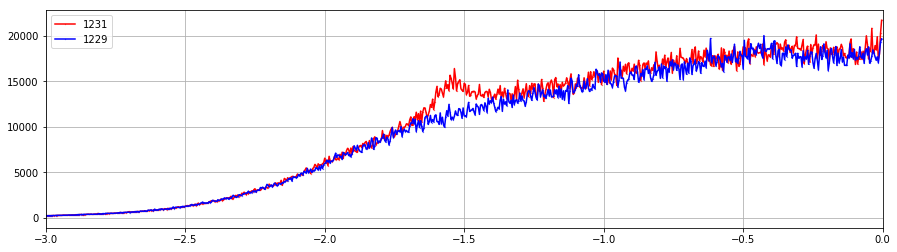

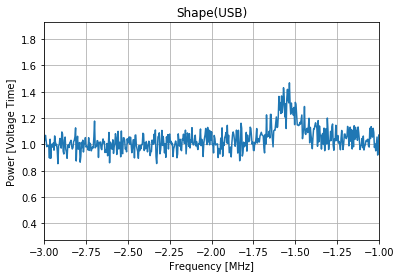

In [34]:
USB_onlinegal = np.fft.fftshift(meangal1229)[0:8000]
USB_offlinegal = np.fft.fftshift(meangal1231)[0:8000]

plt.figure(figsize=(15,4))
plt.plot(f[0:8000], USB_onlinegal, 'r.-', markersize=0.5)
plt.plot(f[0:8000], USB_offlinegal, 'b.-',markersize=0.5)
plt.grid(True)
plt.xlim(-3,0)
plt.legend(('1231', '1229'))
plt.show()

shape2 = USB_onlinegal/USB_offlinegal
plt.title('Shape(USB)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Voltage Time]')
plt.grid(True)
plt.plot(f[0:8000], shape2)
plt.xlim(-3,-1)
plt.show()

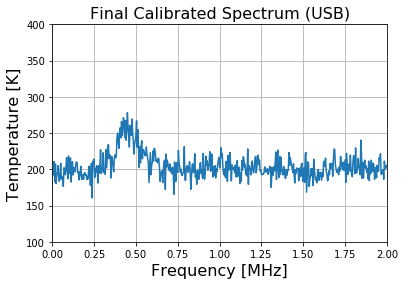

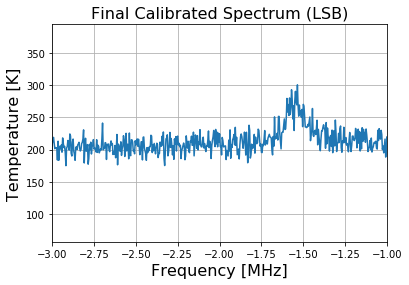

[115]


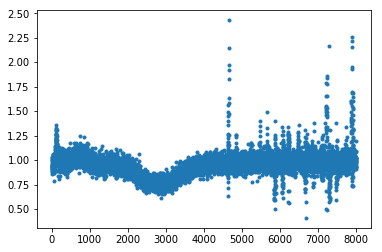

0.44921875


In [122]:

final_spec1 = shape1*205
plt.plot(f[8000:],final_spec1)
plt.title('Final Calibrated Spectrum (USB)',fontsize=16)
plt.ylabel('Temperature [K]',fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.grid(True)
plt.xlim(0,2)
plt.ylim(100, 400)
plt.show()

final_spec2 = shape2*205
plt.plot(f[0:8000],final_spec2)
plt.title('Final Calibrated Spectrum (LSB)',fontsize=16)
plt.ylabel('Temperature [K]',fontsize=16)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.grid(True)
plt.xlim(-3,-1)
plt.show()

peaks = peak_finder(shape1[0:200])
print(peaks)

fd = f[8000:][115]
plt.plot(shape1, '.')
plt.show()
print(fd)

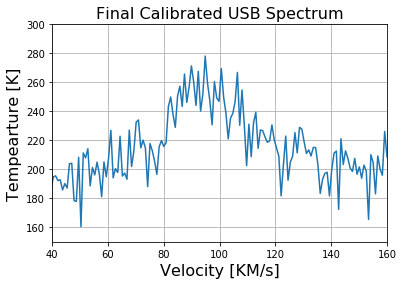

In [58]:
fo = 1420
c =  299792 #km/s
fv = -(fo - (f + 1420))/fo*c

plt.plot(fv[8000:], final_spec1)
plt.xlim(40,160)
plt.ylim(150,300)
plt.xlabel('Velocity [KM/s]', fontsize=16)
plt.ylabel('Tempearture [K]', fontsize=16)
plt.title('Final Calibrated USB Spectrum', fontsize=16)
plt.grid(True)
plt.show()

In [37]:
opp = (4.75*2) + 3.49

adj = (4.75*4)+ 2

rad = np.tan(opp/adj) + np.pi
print(rad*(180/np.pi))

alt = (3/19) * 90
print(alt)
# the galactic coordinate give (120, 0) was not giving us anything meanful so
#we used an smart phone application called SkyView to locate the genearl direction of the galactic center.
#accoring to our azimuth and altitude that we calculated ourselve. Altitude using 
#20 nodes on the horn where the first node represent 0th degree and we measured 4 nodes 3/19 * 90 degree. 
# azimuth using trignometry and calculated to be 220 degree. And given our spherical coordinate transformation,
# we get the galactic coordinate to be ra and dec and then galactic coordinate: epoch = 2000, 353.31 degree (l),
#-33.60 degree (b). actual 0 and -28. 

220.780531
14.210526315789473


In [38]:
# local now = Sat Feb 24 09:02:12 2018
# ut now = Sat Feb 24 17:02:12 2018
# Unixe_now = 1519491732.2
# julian_now = 2458174.20986
# lst_now = 5.02332636193

corrected_v = doppler.get_projected_velocity(5.0233, 37.873199, 2458174.20986, obs_lat=37.873199, obs_lon=-122.257063, obs_alt=120.0, epoch=2451545.0)

[-18.0873842]


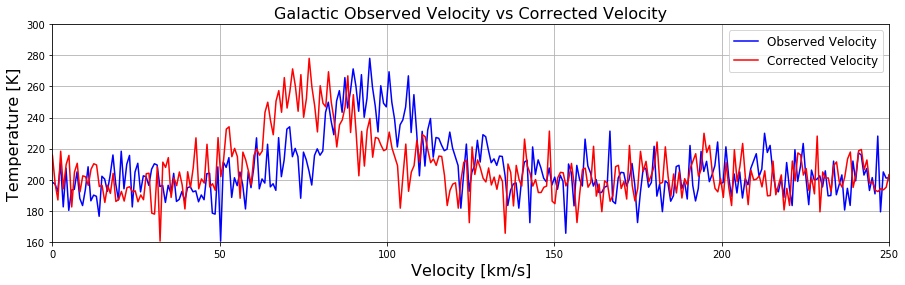

In [123]:
corr_v = corrected_v/1000 #km/s
print(corr_v)
corr_fv = corr_v + fv

plt.figure(figsize=(15,4))

plt.plot(fv[8000:], final_spec1, 'b-')
plt.plot(corr_fv[8000:], final_spec1, 'r-')
plt.ylim(160, 300)
plt.xlim(0,250)
plt.legend(['Observed Velocity', 'Corrected Velocity'], fontsize=12)
plt.title('Galactic Observed Velocity vs Corrected Velocity', fontsize = 16)
plt.xlabel('Velocity [km/s]', fontsize = 16)
plt.ylabel('Temperature [K]', fontsize = 16)
plt.grid(True)
plt.show()